In [ ]:
pip install geopandas shapely


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### **Data Preparation**

In [ ]:
df_gempa = pd.read_csv('/content/drive/MyDrive/Projek/dummy/gempa/katalog_gempa.tsv',sep='\t')

/tmp/ipython-input-4098621726.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gempa = pd.read_csv('/content/drive/MyDrive/Projek/dummy/gempa/katalog_gempa.tsv',sep='\t')


In [ ]:
df_gempa.head()

,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,...,doubleCouple,clvd,strikeNP1,dipNP1,rakeNP1,strikeNP2,dipNP2,rakeNP2,azgapFM,misfit
0,bmg2008vkye,2008-11-01 00:31:25.143741+00:00,-0.604440,98.895531,2.989742,MLv,20,6.0,146.70738,"Southern Sumatra, Indonesia",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bmg2008vlag,2008-11-01 01:34:29.660856+00:00,-6.611860,129.387220,5.507549,mb,30,62.0,45.46764,Banda Sea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bmg2008vlaj,2008-11-01 01:38:14.802129+00:00,-3.650586,127.990680,3.539674,MLv,5,4.0,331.97404,"Seram, Indonesia",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bmg2008vlbt,2008-11-01 02:20:05.909515+00:00,-4.198925,128.097000,2.424314,MLv,5,5.0,326.37993,Banda Sea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bmg2008vlcd,2008-11-01 02:32:18.756155+00:00,-4.091891,128.200470,2.410045,MLv,10,5.0,314.65474,Banda Sea,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_gempa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131833 entries, 0 to 131832
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   eventID            131833 non-null  object 
 1   datetime           131833 non-null  object 
 2   latitude           131833 non-null  float64
 3   longitude          131833 non-null  float64
 4   magnitude          131134 non-null  float64
 5   mag_type           131134 non-null  object 
 6   depth              131833 non-null  int64  
 7   phasecount         131831 non-null  float64
 8   azimuth_gap        131829 non-null  float64
 9   location           131817 non-null  object 
 10  agency             128390 non-null  object 
 11  datetimeFM         4607 non-null    object 
 12  latFM              4607 non-null    float64
 13  lonFM              4607 non-null    float64
 14  magFM              3908 non-null    float64
 15  magTypeFM          3908 non-null    object 
 16  de

In [ ]:
df_gempa_copy = df_gempa[['eventID','datetime','latitude','longitude','magnitude','mag_type','depth','phasecount','azimuth_gap','location','agency']].copy()

In [ ]:
df_gempa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131833 entries, 0 to 131832
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventID      131833 non-null  object 
 1   datetime     131833 non-null  object 
 2   latitude     131833 non-null  float64
 3   longitude    131833 non-null  float64
 4   magnitude    131134 non-null  float64
 5   mag_type     131134 non-null  object 
 6   depth        131833 non-null  int64  
 7   phasecount   131831 non-null  float64
 8   azimuth_gap  131829 non-null  float64
 9   location     131817 non-null  object 
 10  agency       128390 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 11.1+ MB


In [ ]:
df_gempa_copy['datetime'] = pd.to_datetime(df_gempa_copy['datetime'], format='mixed', utc=True)


In [ ]:
df_gempa_fix = df_gempa_copy[df_gempa_copy['datetime'].dt.year > 2020].copy()

In [ ]:
df_gempa_fix

,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,agency
77630,bmg2021aaat,2021-01-01 00:22:54.920667+00:00,-8.214952,117.809219,3.483098,M,19,23.0,112.881405,"Sumbawa Region, Indonesia",BMKG
77631,bmg2021aabb,2021-01-01 00:33:29.697003+00:00,-9.013550,118.489365,4.275109,M,67,51.0,152.755386,"Sumbawa Region, Indonesia",BMKG
77632,bmg2021aafc,2021-01-01 02:33:53.821278+00:00,-1.848494,120.531387,3.920442,M,10,31.0,51.862602,"Sulawesi, Indonesia",BMKG
77633,bmg2021aagp,2021-01-01 03:19:52.998527+00:00,-6.043216,114.037796,5.577193,M,10,11.0,135.619244,Bali Sea,BMKG
77634,bmg2021aagq,2021-01-01 03:21:15.922894+00:00,-9.901868,120.742447,3.047903,MLv,41,16.0,152.238293,"Sumba Region, Indonesia",BMKG
...,...,...,...,...,...,...,...,...,...,...,...
131828,bmg2025tfhc,2025-10-01 06:27:13.361342+00:00,4.172718,97.580437,3.375946,M,10,10.0,102.930218,"Northern Sumatra, Indonesia",BMKG
131829,bmg2025tfjc,2025-10-01 07:27:26.179947+00:00,-2.945021,120.659164,2.492122,ML,11,9.0,273.011368,"Sulawesi, Indonesia",BMKG
131830,bmg2025tfml,2025-10-01 09:08:34.331422+00:00,-8.673040,123.752190,4.435225,MLv,78,55.0,56.992619,"Flores Region, Indonesia",BMKG
131831,bmg2025tfor,2025-10-01 10:16:04.080532+00:00,-7.294141,114.166641,2.650229,M,10,7.0,217.101517,Bali Sea,BMKG


In [ ]:
path = '/content/drive/MyDrive/Projek/dummy/gempa/geoBoundaries-IDN-ADM1.geojson'
gdf_indonesia = gpd.read_file(path)

In [ ]:
print(gdf_indonesia['shapeName'].unique())


['Bali' 'West Nusa Tenggara' 'Banten' 'Central Java' 'West Java'
 'Central Kalimantan' 'South Kalimantan' 'West Kalimantan'
 'Central Sulawesi' 'Gorontalo' 'North Sulawesi' 'South Sulawesi'
 'Southeast Sulawesi' 'West Sulawesi' 'Aceh' 'Bengkulu' 'Jambi' 'Lampung'
 'Riau' 'West Sumatra' 'South Sumatra' 'North Sumatra'
 'East Nusa Tenggara' 'Maluku' 'North Maluku' 'East Java'
 'Bangka-Belitung Islands' 'Riau Islands' 'Papua' 'West Papua'
 'East Kalimantan' 'North Kalimantan' 'Special Region of Yogyakarta'
 'Jakarta Special Capital Region']


In [ ]:
# Kamus translasi nama provinsi
translate_prov = {
    "Aceh": "Aceh",
    "North Sumatra": "Sumatera Utara",
    "West Sumatra": "Sumatera Barat",
    "Riau": "Riau",
    "Jambi": "Jambi",
    "South Sumatra": "Sumatera Selatan",
    "Bengkulu": "Bengkulu",
    "Lampung": "Lampung",
    "Bangka-Belitung Islands": "Kepulauan Bangka Belitung",
    "Riau Islands": "Kepulauan Riau",
    "Banten": "Banten",
    "Jakarta Special Capital Region": "DKI Jakarta",
    "West Java": "Jawa Barat",
    "Central Java": "Jawa Tengah",
    "Special Region of Yogyakarta": "DI Yogyakarta",
    "East Java": "Jawa Timur",
    "Bali": "Bali",
    "West Nusa Tenggara": "Nusa Tenggara Barat",
    "East Nusa Tenggara": "Nusa Tenggara Timur",
    "West Kalimantan": "Kalimantan Barat",
    "Central Kalimantan": "Kalimantan Tengah",
    "South Kalimantan": "Kalimantan Selatan",
    "East Kalimantan": "Kalimantan Timur",
    "North Kalimantan": "Kalimantan Utara",
    "North Sulawesi": "Sulawesi Utara",
    "Central Sulawesi": "Sulawesi Tengah",
    "South Sulawesi": "Sulawesi Selatan",
    "Southeast Sulawesi": "Sulawesi Tenggara",
    "West Sulawesi": "Sulawesi Barat",
    "Gorontalo": "Gorontalo",
    "Maluku": "Maluku",
    "North Maluku": "Maluku Utara",
    "West Papua": "Papua Barat",
    "Papua": "Papua"
}


In [ ]:
gdf_indonesia['shapeName'] = gdf_indonesia['shapeName'].map(translate_prov)

In [ ]:
print(gdf_indonesia['shapeName'].unique())


['Bali' 'Nusa Tenggara Barat' 'Banten' 'Jawa Tengah' 'Jawa Barat'
 'Kalimantan Tengah' 'Kalimantan Selatan' 'Kalimantan Barat'
 'Sulawesi Tengah' 'Gorontalo' 'Sulawesi Utara' 'Sulawesi Selatan'
 'Sulawesi Tenggara' 'Sulawesi Barat' 'Aceh' 'Bengkulu' 'Jambi' 'Lampung'
 'Riau' 'Sumatera Barat' 'Sumatera Selatan' 'Sumatera Utara'
 'Nusa Tenggara Timur' 'Maluku' 'Maluku Utara' 'Jawa Timur'
 'Kepulauan Bangka Belitung' 'Kepulauan Riau' 'Papua' 'Papua Barat'
 'Kalimantan Timur' 'Kalimantan Utara' 'DI Yogyakarta' 'DKI Jakarta']
Total Kasus (34)


In [ ]:
geometry = [Point(xy) for xy in zip(df_gempa_fix['longitude'], df_gempa_fix['latitude'])]
gdf_gempa = gpd.GeoDataFrame(df_gempa_fix, geometry=geometry, crs="EPSG:4326")

In [ ]:
gdf_gempa_prov_indo = gpd.sjoin(gdf_gempa, gdf_indonesia, how="left", predicate="within")
gdf_gempa_prov_indo.head()

,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,agency,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
77630,bmg2021aaat,2021-01-01 00:22:54.920667+00:00,-8.214952,117.809219,3.483098,M,19,23.0,112.881405,"Sumbawa Region, Indonesia",BMKG,POINT (117.80922 -8.21495),1.0,Nusa Tenggara Barat,ID-NB,65028918B98829509874887,IDN,ADM1
77631,bmg2021aabb,2021-01-01 00:33:29.697003+00:00,-9.013550,118.489365,4.275109,M,67,51.0,152.755386,"Sumbawa Region, Indonesia",BMKG,POINT (118.48936 -9.01355),NaN,NaN,NaN,NaN,NaN,NaN
77632,bmg2021aafc,2021-01-01 02:33:53.821278+00:00,-1.848494,120.531387,3.920442,M,10,31.0,51.862602,"Sulawesi, Indonesia",BMKG,POINT (120.53139 -1.84849),8.0,Sulawesi Tengah,ID-ST,65028918B55787629749874,IDN,ADM1
77633,bmg2021aagp,2021-01-01 03:19:52.998527+00:00,-6.043216,114.037796,5.577193,M,10,11.0,135.619244,Bali Sea,BMKG,POINT (114.0378 -6.04322),NaN,NaN,NaN,NaN,NaN,NaN
77634,bmg2021aagq,2021-01-01 03:21:15.922894+00:00,-9.901868,120.742447,3.047903,MLv,41,16.0,152.238293,"Sumba Region, Indonesia",BMKG,POINT (120.74245 -9.90187),NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
gdf_gempa_prov_indo = gdf_gempa_prov_indo.dropna(subset=['shapeName'])

In [ ]:
gdf_gempa_prov_indo.groupby('shapeName')['eventID'].count()

,eventID
shapeName,
Aceh,1072
Bali,131
Banten,88
Bengkulu,181
DI Yogyakarta,69
Gorontalo,470
Jambi,132
Jawa Barat,1256
Jawa Tengah,164


In [ ]:
gdf_gempa_prov_indo.head()

,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,agency,geometry,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType
77630,bmg2021aaat,2021-01-01 00:22:54.920667+00:00,-8.214952,117.809219,3.483098,M,19,23.0,112.881405,"Sumbawa Region, Indonesia",BMKG,POINT (117.80922 -8.21495),1.0,Nusa Tenggara Barat,ID-NB,65028918B98829509874887,IDN,ADM1
77632,bmg2021aafc,2021-01-01 02:33:53.821278+00:00,-1.848494,120.531387,3.920442,M,10,31.0,51.862602,"Sulawesi, Indonesia",BMKG,POINT (120.53139 -1.84849),8.0,Sulawesi Tengah,ID-ST,65028918B55787629749874,IDN,ADM1
77636,bmg2021aagv,2021-01-01 03:27:03.027587+00:00,4.320011,96.516106,2.754105,M,10,11.0,140.309876,"Northern Sumatra, Indonesia",BMKG,POINT (96.51611 4.32001),14.0,Aceh,ID-AC,65028918B93184959873838,IDN,ADM1
77641,bmg2021aalp,2021-01-01 05:51:06.697746+00:00,-9.693743,119.830826,2.870826,M,50,18.0,159.696602,"Sumba Region, Indonesia",BMKG,POINT (119.83083 -9.69374),22.0,Nusa Tenggara Timur,ID-NT,65028918B90323071856071,IDN,ADM1
77653,bmg2021abwi,2021-01-02 00:24:09.928771+00:00,-8.445683,116.235176,1.970980,M,18,8.0,199.645309,"Sumbawa Region, Indonesia",BMKG,POINT (116.23518 -8.44568),1.0,Nusa Tenggara Barat,ID-NB,65028918B98829509874887,IDN,ADM1


In [ ]:
gdf_gempa_prov_indo.shape

(18112, 18)

In [ ]:
gdf_gempa_prov_indo.to_csv('/content/drive/MyDrive/Projek/dummy/gempa/df_gempa_prov_indo.csv', index=False)

In [ ]:
gdf_jabar = gdf_gempa_prov_indo[gdf_gempa_prov_indo['shapeName'].str.contains('Jawa Barat', case=False, na=False)]

In [ ]:
gdf_jabar.rename(columns={'shapeName': 'provinsi'}, inplace=True)
gdf_jabar = gdf_jabar.drop(columns=['index_right','shapeISO','shapeID','shapeGroup','shapeType'])

gdf_jabar.head()

/tmp/ipython-input-1762068893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_jabar.rename(columns={'shapeName': 'provinsi'}, inplace=True)


,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,agency,geometry,provinsi
77803,bmg2021alnn,2021-01-07 07:19:24.290428+00:00,-7.135984,107.017738,2.739900,M,81,18.0,131.191902,"Java, Indonesia",BMKG,POINT (107.01774 -7.13598),Jawa Barat
77898,bmg2021atfy,2021-01-11 12:35:05.491556+00:00,-6.788152,106.966156,3.184025,M,10,27.0,79.460396,"Java, Indonesia",BMKG,POINT (106.96616 -6.78815),Jawa Barat
78102,bmg2021bicy,2021-01-19 16:06:36.277710+00:00,-7.024271,106.764603,2.244145,MLv,10,13.0,86.615021,"Java, Indonesia",BMKG,POINT (106.7646 -7.02427),Jawa Barat
78241,bmg2021btbc,2021-01-25 15:39:25.446743+00:00,-7.358956,106.628967,3.053780,M,81,16.0,181.640175,"Java, Indonesia",BMKG,POINT (106.62897 -7.35896),Jawa Barat
78815,bmg2021doym,2021-02-20 20:52:55.253900+00:00,-7.334364,106.911804,2.678734,M,110,19.0,164.149933,"Java, Indonesia",BMKG,POINT (106.9118 -7.33436),Jawa Barat


In [ ]:
print(f"Jumlah baris: {len(gdf_jabar)}")

Jumlah baris: 1256


In [ ]:
# Simpan ulang sebagai CSV
gdf_jabar.to_csv('/content/drive/MyDrive/Projek/dummy/gempa/df_gempa_jabar.csv', index=False)

### **Data Cleaning**

In [ ]:
df_gempa = pd.read_csv('/content/drive/MyDrive/Projek/dummy/gempa/df_gempa_jabar.csv')
df_gempa

,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,agency,geometry,provinsi
0,bmg2021alnn,2021-01-07 07:19:24.290428+00:00,-7.135984,107.017738,2.739900,M,81,18.0,131.191902,"Java, Indonesia",BMKG,POINT (107.0177383 -7.135984421),Jawa Barat
1,bmg2021atfy,2021-01-11 12:35:05.491556+00:00,-6.788152,106.966156,3.184025,M,10,27.0,79.460396,"Java, Indonesia",BMKG,POINT (106.966156 -6.788151741),Jawa Barat
2,bmg2021bicy,2021-01-19 16:06:36.277710+00:00,-7.024271,106.764603,2.244145,MLv,10,13.0,86.615021,"Java, Indonesia",BMKG,POINT (106.7646027 -7.024271488),Jawa Barat
3,bmg2021btbc,2021-01-25 15:39:25.446743+00:00,-7.358956,106.628967,3.053780,M,81,16.0,181.640175,"Java, Indonesia",BMKG,POINT (106.6289673 -7.35895586),Jawa Barat
4,bmg2021doym,2021-02-20 20:52:55.253900+00:00,-7.334364,106.911804,2.678734,M,110,19.0,164.149933,"Java, Indonesia",BMKG,POINT (106.9118042 -7.334364414),Jawa Barat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,bmg2025swsh,2025-09-26 13:52:39.454211+00:00,-6.728476,106.592880,2.544185,M,10,29.0,68.617271,"Java, Indonesia",BMKG,POINT (106.59288024902344 -6.728476047515869),Jawa Barat
1252,bmg2025swus,2025-09-26 15:04:24.454791+00:00,-6.732298,106.562340,2.223354,ML,10,13.0,156.425983,"Java, Indonesia",BMKG,POINT (106.56233978271484 -6.732297897338867),Jawa Barat
1253,bmg2025swuu,2025-09-26 15:08:55.221133+00:00,-6.738151,106.588814,2.924220,M,10,21.0,63.111359,"Java, Indonesia",BMKG,POINT (106.58881378173828 -6.73815107345581),Jawa Barat
1254,bmg2025tagc,2025-09-28 12:15:15.518186+00:00,-6.728928,106.598000,2.487048,M,12,27.0,68.505756,"Java, Indonesia",BMKG,POINT (106.5979995727539 -6.728928089141846),Jawa Barat


*Menambahkan Detail Kabupaten*

In [ ]:
path = '/content/drive/MyDrive/Projek/dummy/gempa/geoBoundaries-IDN-ADM2.geojson'
gdf_indonesia = gpd.read_file(path)
gdf_indonesia.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Aceh Barat,,22746128B65593111718524,IDN,ADM2,"POLYGON ((96.49109 4.62277, 96.49096 4.62316, ..."
1,Aceh Barat Daya,,22746128B227561513795,IDN,ADM2,"MULTIPOLYGON (((96.80559 3.71758, 96.80667 3.7..."
2,Aceh Besar,,22746128B90547447297479,IDN,ADM2,"MULTIPOLYGON (((95.20544 5.28072, 95.20523 5.2..."
3,Aceh Jaya,,22746128B21424895456858,IDN,ADM2,"MULTIPOLYGON (((95.58431 4.61495, 95.58558 4.6..."
4,Aceh Selatan,,22746128B12428400263117,IDN,ADM2,"MULTIPOLYGON (((97.59461 2.80777, 97.59461 2.8..."


In [ ]:
kabupaten_jabar = [
    "Bandung", "Bandung Barat", "Bekasi", "Bogor", "Ciamis", "Cianjur",
    "Cirebon", "Garut", "Indramayu", "Karawang", "Kuningan",
    "Majalengka", "Pangandaran", "Purwakarta", "Subang",
    "Sukabumi", "Sumedang", "Tasikmalaya","Banjar"
]

# Filter hanya kabupaten yang ada di daftar di atas
gdf_jabar = gdf_indonesia[gdf_indonesia['shapeName'].isin(kabupaten_jabar)]

# Cek hasil
print("Jumlah kab/kota Jawa Barat:", len(gdf_jabar))
print(gdf_jabar[['shapeName', 'geometry']].head())

Jumlah kab/kota Jawa Barat: 19
        shapeName                                           geometry
17        Bandung  MULTIPOLYGON (((107.75 -6.81284, 107.74944 -6....
18  Bandung Barat  POLYGON ((107.52505 -6.92075, 107.52507 -6.920...
28         Banjar  POLYGON ((115.55659 -2.82817, 115.55618 -2.829...
43         Bekasi  POLYGON ((107.09815 -5.94009, 107.09731 -5.938...
61          Bogor  POLYGON ((106.99397 -6.36713, 106.9939 -6.3669...


In [ ]:
geometry = [Point(xy) for xy in zip(df_gempa['longitude'], df_gempa['latitude'])]
gdf_join = gpd.GeoDataFrame(df_gempa, geometry=geometry, crs="EPSG:4326")

In [ ]:
gdf_gempa = gpd.sjoin(gdf_join, gdf_jabar, how="left", predicate="within")

In [ ]:
gdf_gempa.isna().sum(axis=0)

,0
eventID,0
datetime,0
latitude,0
longitude,0
magnitude,6
mag_type,6
depth,0
phasecount,0
azimuth_gap,0
location,0


In [ ]:
gdf_gempa = gdf_gempa.dropna(subset=['magnitude', 'mag_type','shapeID',])

In [ ]:
gdf_gempa.isna().sum(axis=0)

,0
eventID,0
datetime,0
latitude,0
longitude,0
magnitude,0
mag_type,0
depth,0
phasecount,0
azimuth_gap,0
location,0


In [ ]:
gdf_gempa.describe()

,latitude,longitude,magnitude,depth,phasecount,azimuth_gap,index_right
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,-6.937160,107.135754,2.518982,25.647967,23.625203,123.646198,171.449593
std,0.235525,0.412297,0.654499,40.514757,25.575463,44.241016,167.417294
min,-7.765263,106.393341,1.140731,2.000000,2.000000,21.326904,17.000000
25%,-7.151067,106.957434,2.101551,10.000000,11.000000,90.313018,86.000000
50%,-6.843800,107.089565,2.409768,10.000000,17.000000,120.111832,86.000000
75%,-6.787296,107.310768,2.846249,16.000000,28.000000,154.280439,278.000000
max,-6.255519,108.612671,6.086901,354.000000,406.000000,305.472229,491.000000


In [ ]:
gdf_gempa['eventID'].value_counts()

,count
eventID,
bmg2025tajt,1
bmg2021alnn,1
bmg2021atfy,1
bmg2021bicy,1
bmg2021btbc,1
...,...
bmg2021hzdb,1
bmg2021hzbo,1
bmg2021hyqe,1


In [ ]:
gdf_gempa.duplicated().sum()


np.int64(0)

In [ ]:
gdf_gempa['datetime'] = pd.to_datetime(gdf_gempa['datetime'], format='mixed', utc=True)
gdf_gempa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1230 entries, 0 to 1255
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   eventID      1230 non-null   object             
 1   datetime     1230 non-null   datetime64[ns, UTC]
 2   latitude     1230 non-null   float64            
 3   longitude    1230 non-null   float64            
 4   magnitude    1230 non-null   float64            
 5   mag_type     1230 non-null   object             
 6   depth        1230 non-null   int64              
 7   phasecount   1230 non-null   float64            
 8   azimuth_gap  1230 non-null   float64            
 9   location     1230 non-null   object             
 10  agency       1230 non-null   object             
 11  geometry     1230 non-null   geometry           
 12  provinsi     1230 non-null   object             
 13  index_right  1230 non-null   float64            
 14  shapeName    1230 non

In [ ]:
gdf_gempa['datetime'] = gdf_gempa['datetime'].dt.tz_convert('Asia/Jakarta')
gdf_gempa['date'] = gdf_gempa['datetime'].dt.date
gdf_gempa['time'] = gdf_gempa['datetime'].dt.time

In [ ]:
gdf_gempa.head()

,eventID,datetime,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,location,...,geometry,provinsi,index_right,shapeName,shapeISO,shapeID,shapeGroup,shapeType,date,time
0,bmg2021alnn,2021-01-07 14:19:24.290428+07:00,-7.135984,107.017738,2.739900,M,81,18.0,131.191902,"Java, Indonesia",...,POINT (107.01774 -7.13598),Jawa Barat,86.0,Cianjur,,22746128B34542084533901,IDN,ADM2,2021-01-07,14:19:24.290428
1,bmg2021atfy,2021-01-11 19:35:05.491556+07:00,-6.788152,106.966156,3.184025,M,10,27.0,79.460396,"Java, Indonesia",...,POINT (106.96616 -6.78815),Jawa Barat,462.0,Sukabumi,,22746128B66929526216355,IDN,ADM2,2021-01-11,19:35:05.491556
2,bmg2021bicy,2021-01-19 23:06:36.277710+07:00,-7.024271,106.764603,2.244145,MLv,10,13.0,86.615021,"Java, Indonesia",...,POINT (106.7646 -7.02427),Jawa Barat,462.0,Sukabumi,,22746128B66929526216355,IDN,ADM2,2021-01-19,23:06:36.277710
3,bmg2021btbc,2021-01-25 22:39:25.446743+07:00,-7.358956,106.628967,3.053780,M,81,16.0,181.640175,"Java, Indonesia",...,POINT (106.62897 -7.35896),Jawa Barat,462.0,Sukabumi,,22746128B66929526216355,IDN,ADM2,2021-01-25,22:39:25.446743
4,bmg2021doym,2021-02-21 03:52:55.253900+07:00,-7.334364,106.911804,2.678734,M,110,19.0,164.149933,"Java, Indonesia",...,POINT (106.9118 -7.33436),Jawa Barat,86.0,Cianjur,,22746128B34542084533901,IDN,ADM2,2021-02-21,03:52:55.253900


In [ ]:
cols = gdf_gempa.columns.tolist()

new_order = ['eventID', 'date', 'time'] + [col for col in cols if col not in ['eventID', 'date', 'time']]
df_gempa = gdf_gempa[new_order]


In [ ]:
df_gempa = df_gempa.drop(columns=['datetime','time','location','shapeISO','shapeGroup'])
df_gempa.head()

,eventID,date,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,agency,geometry,provinsi,index_right,shapeName,shapeID,shapeType
0,bmg2021alnn,2021-01-07,-7.135984,107.017738,2.739900,M,81,18.0,131.191902,BMKG,POINT (107.01774 -7.13598),Jawa Barat,86.0,Cianjur,22746128B34542084533901,ADM2
1,bmg2021atfy,2021-01-11,-6.788152,106.966156,3.184025,M,10,27.0,79.460396,BMKG,POINT (106.96616 -6.78815),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2
2,bmg2021bicy,2021-01-19,-7.024271,106.764603,2.244145,MLv,10,13.0,86.615021,BMKG,POINT (106.7646 -7.02427),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2
3,bmg2021btbc,2021-01-25,-7.358956,106.628967,3.053780,M,81,16.0,181.640175,BMKG,POINT (106.62897 -7.35896),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2
4,bmg2021doym,2021-02-21,-7.334364,106.911804,2.678734,M,110,19.0,164.149933,BMKG,POINT (106.9118 -7.33436),Jawa Barat,86.0,Cianjur,22746128B34542084533901,ADM2


In [ ]:
df_gempa.rename(columns={'shapeName': 'kabupaten'}, inplace=True)

*Eksplorasi Data*

In [ ]:
gempa_terkuat = df_gempa.nlargest(5, 'magnitude')
gempa_terkuat

,eventID,date,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,agency,geometry,provinsi,index_right,kabupaten,shapeID,shapeType
517,bmg2022xqqm,2022-12-03,-7.329588,107.545929,6.086901,Mw(mB),119,301.0,21.326904,BMKG,POINT (107.54593 -7.32959),Jawa Barat,104.0,Garut,22746128B66421464971893,ADM2
548,bmg2022xzcf,2022-12-08,-7.003688,106.979050,5.965893,Mw(mB),117,235.0,37.138641,BMKG,POINT (106.97905 -7.00369),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2
176,bmg2022wulo,2022-11-21,-6.870994,107.016846,5.600369,Mw(mB),11,406.0,30.343704,BMKG,POINT (107.01685 -6.87099),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2
781,bmg2023tfcg,2023-10-01,-7.210086,106.585091,5.350891,Mw(mB),109,293.0,33.961868,BMKG,POINT (106.58509 -7.21009),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2
23,bmg2021iqlr,2021-05-04,-7.355253,106.888062,5.204910,M,10,10.0,210.173958,BMKG,POINT (106.88806 -7.35525),Jawa Barat,86.0,Cianjur,22746128B34542084533901,ADM2


In [ ]:
# Mencari nilai min dan max dari 'mag'
min_mag = df_gempa['magnitude'].min()
max_mag = df_gempa['magnitude'].max()
print ('magnitudo terkecil:', min_mag)
print ('magnitudo terbesar:', max_mag)

# Keterangan gempa berdasarkan magnitudo
bins = [float('-inf'), 3.0, 4.0, float('inf')]  # Defining bin edges
labels = ['Kecil', 'Sedang', 'Kuat']  # Labels for the groups
df_gempa['keterangan'] = pd.cut(df_gempa['magnitude'], bins=bins, labels=labels, right=False)  # Group by mag
print(df_gempa[['date', 'magnitude', 'keterangan']])

magnitudo terkecil: 1.140731141
magnitudo terbesar: 6.086900809
            date  magnitude keterangan
0     2021-01-07   2.739900      Kecil
1     2021-01-11   3.184025     Sedang
2     2021-01-19   2.244145      Kecil
3     2021-01-25   3.053780     Sedang
4     2021-02-21   2.678734      Kecil
...          ...        ...        ...
1251  2025-09-26   2.544185      Kecil
1252  2025-09-26   2.223354      Kecil
1253  2025-09-26   2.924220      Kecil
1254  2025-09-28   2.487048      Kecil
1255  2025-09-28   2.708480      Kecil

[1230 rows x 3 columns]


In [ ]:
df_gempa.value_counts('keterangan')

,count
keterangan,
Kecil,999
Sedang,191
Kuat,40


In [ ]:
df_gempa.head()

,eventID,date,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,agency,geometry,provinsi,index_right,kabupaten,shapeID,shapeType,keterangan
0,bmg2021alnn,2021-01-07,-7.135984,107.017738,2.739900,M,81,18.0,131.191902,BMKG,POINT (107.01774 -7.13598),Jawa Barat,86.0,Cianjur,22746128B34542084533901,ADM2,Kecil
1,bmg2021atfy,2021-01-11,-6.788152,106.966156,3.184025,M,10,27.0,79.460396,BMKG,POINT (106.96616 -6.78815),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2,Sedang
2,bmg2021bicy,2021-01-19,-7.024271,106.764603,2.244145,MLv,10,13.0,86.615021,BMKG,POINT (106.7646 -7.02427),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2,Kecil
3,bmg2021btbc,2021-01-25,-7.358956,106.628967,3.053780,M,81,16.0,181.640175,BMKG,POINT (106.62897 -7.35896),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2,Sedang
4,bmg2021doym,2021-02-21,-7.334364,106.911804,2.678734,M,110,19.0,164.149933,BMKG,POINT (106.9118 -7.33436),Jawa Barat,86.0,Cianjur,22746128B34542084533901,ADM2,Kecil


In [ ]:
# Simpan csv
df_gempa.to_csv('/content/drive/MyDrive/Projek/dummy/gempa/df_gempa_jabar_cleaned.csv', index=False)

### **Clustering**

In [ ]:
df_gempa = pd.read_csv('/content/drive/MyDrive/Projek/dummy/gempa/df_gempa_jabar_cleaned.csv')
df_gempa.head()

,eventID,date,latitude,longitude,magnitude,mag_type,depth,phasecount,azimuth_gap,agency,geometry,provinsi,index_right,kabupaten,shapeID,shapeType,keterangan
0,bmg2021alnn,2021-01-07,-7.135984,107.017738,2.739900,M,81,18.0,131.191902,BMKG,POINT (107.0177383 -7.135984421),Jawa Barat,86.0,Cianjur,22746128B34542084533901,ADM2,Kecil
1,bmg2021atfy,2021-01-11,-6.788152,106.966156,3.184025,M,10,27.0,79.460396,BMKG,POINT (106.966156 -6.788151741),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2,Sedang
2,bmg2021bicy,2021-01-19,-7.024271,106.764603,2.244145,MLv,10,13.0,86.615021,BMKG,POINT (106.7646027 -7.024271488),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2,Kecil
3,bmg2021btbc,2021-01-25,-7.358956,106.628967,3.053780,M,81,16.0,181.640175,BMKG,POINT (106.6289673 -7.35895586),Jawa Barat,462.0,Sukabumi,22746128B66929526216355,ADM2,Sedang
4,bmg2021doym,2021-02-21,-7.334364,106.911804,2.678734,M,110,19.0,164.149933,BMKG,POINT (106.9118042 -7.334364414),Jawa Barat,86.0,Cianjur,22746128B34542084533901,ADM2,Kecil


In [ ]:
df_cluster_summary = (
    df_gempa.groupby('kabupaten')
    .agg(
        jumlah_gempa=('eventID', 'count'),
        rata2_magnitude=('magnitude', 'mean'),
        highest_magnitude=('magnitude', 'max'),
        avg_lat=('latitude', 'mean'),
        avg_lon=('longitude', 'mean')
    )
    .reset_index()
)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df_cluster_summary[['jumlah_gempa', 'rata2_magnitude', 'highest_magnitude']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_summary['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
cluster_order = df_cluster_summary.groupby('cluster')['highest_magnitude'].mean().sort_values().index

In [ ]:
cluster_labels = {cluster_order[0]: 'Rawan Rendah', cluster_order[1]: 'Rawan Sedang', cluster_order[2]: 'Rawan Tinggi'}


In [ ]:
df_cluster_summary['cluster_dominan'] = df_cluster_summary['cluster'].map(cluster_labels)


In [ ]:
df_cluster_summary

,kabupaten,jumlah_gempa,rata2_magnitude,highest_magnitude,avg_lat,avg_lon,cluster,cluster_dominan
0,Bandung,125,2.603919,5.148450,-7.204400,107.600897,1,Rawan Tinggi
1,Bandung Barat,17,2.511258,3.812633,-6.855480,107.353679,2,Rawan Rendah
2,Bekasi,1,2.707611,2.707611,-6.370883,107.204071,2,Rawan Rendah
3,Bogor,96,2.570827,4.841443,-6.714890,106.602210,2,Rawan Rendah
4,Ciamis,4,2.927152,3.137340,-7.238375,108.321421,2,Rawan Rendah
5,Cianjur,575,2.302579,5.204910,-6.888827,107.100478,1,Rawan Tinggi
6,Cirebon,3,3.408410,3.833428,-6.814169,108.587598,0,Rawan Sedang
7,Garut,67,2.715475,6.086901,-7.309059,107.655162,1,Rawan Tinggi
8,Indramayu,4,3.994754,4.950596,-6.551671,108.017962,0,Rawan Sedang
9,Karawang,28,2.669818,3.848345,-6.476583,107.261340,2,Rawan Rendah


In [ ]:
# Urutkan ulang cluster agar 0=Rendah, 1=Sedang, 2=Tinggi
order_mapping = {old: new for new, old in enumerate(cluster_order)}

df_cluster_summary['cluster'] = df_cluster_summary['cluster'].map(order_mapping)

# Ganti label berdasarkan urutan baru
label_mapping = {0: 'Rawan Rendah', 1: 'Rawan Sedang', 2: 'Rawan Tinggi'}
df_cluster_summary['cluster_dominan'] = df_cluster_summary['cluster'].map(label_mapping)


In [ ]:
df_cluster_summary

,kabupaten,jumlah_gempa,rata2_magnitude,highest_magnitude,avg_lat,avg_lon,cluster,cluster_dominan
0,Bandung,125,2.603919,5.148450,-7.204400,107.600897,2,Rawan Tinggi
1,Bandung Barat,17,2.511258,3.812633,-6.855480,107.353679,0,Rawan Rendah
2,Bekasi,1,2.707611,2.707611,-6.370883,107.204071,0,Rawan Rendah
3,Bogor,96,2.570827,4.841443,-6.714890,106.602210,0,Rawan Rendah
4,Ciamis,4,2.927152,3.137340,-7.238375,108.321421,0,Rawan Rendah
5,Cianjur,575,2.302579,5.204910,-6.888827,107.100478,2,Rawan Tinggi
6,Cirebon,3,3.408410,3.833428,-6.814169,108.587598,1,Rawan Sedang
7,Garut,67,2.715475,6.086901,-7.309059,107.655162,2,Rawan Tinggi
8,Indramayu,4,3.994754,4.950596,-6.551671,108.017962,1,Rawan Sedang
9,Karawang,28,2.669818,3.848345,-6.476583,107.261340,0,Rawan Rendah


In [ ]:
df_cluster_summary.to_csv('/content/drive/MyDrive/Projek/dummy/gempa/df_gempa_jabar_processed.csv', index=False)

*Membuat file geojson*

In [ ]:

gdf_indonesia = gpd.read_file("/content/drive/MyDrive/Projek/dummy/gempa/geoBoundaries-IDN-ADM2.geojson")

kabupaten_jabar = [
    "Bandung", "Bandung Barat", "Bekasi", "Bogor", "Ciamis", "Cianjur",
    "Cirebon", "Garut", "Indramayu", "Karawang", "Kuningan",
    "Majalengka", "Pangandaran", "Purwakarta", "Subang",
    "Sukabumi", "Sumedang", "Tasikmalaya"
]


In [ ]:
gdf_jabar = gdf_indonesia[gdf_indonesia['shapeName'].isin(kabupaten_jabar)]

In [ ]:
gdf_jabar.rename(columns={'shapeName': 'kabupaten'}, inplace=True)

/tmp/ipython-input-2148983465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_jabar.rename(columns={'shapeName': 'kabupaten'}, inplace=True)


In [ ]:
gdf_final = gdf_jabar.merge(df_cluster_summary, on='kabupaten', how='left')

gdf_final

,kabupaten,shapeISO,shapeID,shapeGroup,shapeType,geometry,jumlah_gempa,rata2_magnitude,highest_magnitude,avg_lat,avg_lon,cluster,cluster_dominan
0,Bandung,,22746128B73297609500416,IDN,ADM2,"MULTIPOLYGON (((107.75 -6.81284, 107.74944 -6....",125,2.603919,5.148450,-7.204400,107.600897,2,Rawan Tinggi
1,Bandung Barat,,22746128B79756617117888,IDN,ADM2,"POLYGON ((107.52505 -6.92075, 107.52507 -6.920...",17,2.511258,3.812633,-6.855480,107.353679,0,Rawan Rendah
2,Bekasi,,22746128B74302729610221,IDN,ADM2,"POLYGON ((107.09815 -5.94009, 107.09731 -5.938...",1,2.707611,2.707611,-6.370883,107.204071,0,Rawan Rendah
3,Bogor,,22746128B99423643145371,IDN,ADM2,"POLYGON ((106.99397 -6.36713, 106.9939 -6.3669...",96,2.570827,4.841443,-6.714890,106.602210,0,Rawan Rendah
4,Ciamis,,22746128B17121530580660,IDN,ADM2,"POLYGON ((108.38574 -7.073, 108.38575 -7.07349...",4,2.927152,3.137340,-7.238375,108.321421,0,Rawan Rendah
5,Cianjur,,22746128B34542084533901,IDN,ADM2,"POLYGON ((107.31175 -7.10812, 107.31162 -7.107...",575,2.302579,5.204910,-6.888827,107.100478,2,Rawan Tinggi
6,Cirebon,,22746128B77544549346240,IDN,ADM2,"MULTIPOLYGON (((108.68501 -6.7699, 108.68548 -...",3,3.408410,3.833428,-6.814169,108.587598,1,Rawan Sedang
7,Garut,,22746128B66421464971893,IDN,ADM2,"POLYGON ((107.72018 -7.25381, 107.72081 -7.254...",67,2.715475,6.086901,-7.309059,107.655162,2,Rawan Tinggi
8,Indramayu,,22746128B59462811669242,IDN,ADM2,"POLYGON ((108.53903 -6.51619, 108.53765 -6.509...",4,3.994754,4.950596,-6.551671,108.017962,1,Rawan Sedang
9,Karawang,,22746128B53840275251202,IDN,ADM2,"POLYGON ((107.17168 -6.48202, 107.17177 -6.482...",28,2.669818,3.848345,-6.476583,107.261340,0,Rawan Rendah


In [ ]:
gdf_final.to_file("/content/drive/MyDrive/Projek/dummy/gempa/gempa_jabar_polygon.geojson", driver="GeoJSON")

print(gdf_final.geom_type.value_counts())

Polygon         16
MultiPolygon     2
Name: count, dtype: int64


### **Visualisasi**

/tmp/ipython-input-2678631765.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gempa_per_prov, x='jumlah_gempa', y='shapeName', palette='viridis')


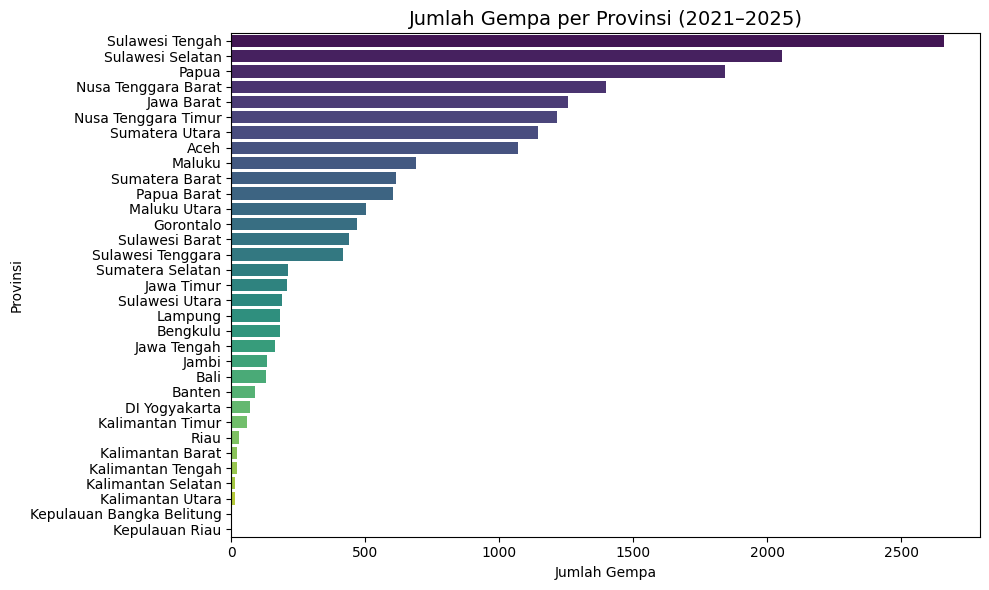

In [ ]:
import matplotlib.pyplot as plt

gempa_per_prov = gdf_gempa_prov_indo['shapeName'].value_counts().reset_index()
gempa_per_prov.columns = ['shapeName', 'jumlah_gempa']

gempa_per_prov = gempa_per_prov.sort_values(by='jumlah_gempa', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=gempa_per_prov, x='jumlah_gempa', y='shapeName', palette='viridis')

plt.title('Jumlah Gempa per Provinsi (2021–2025)', fontsize=14)
plt.xlabel('Jumlah Gempa')
plt.ylabel('Provinsi')
plt.tight_layout()
plt.show()

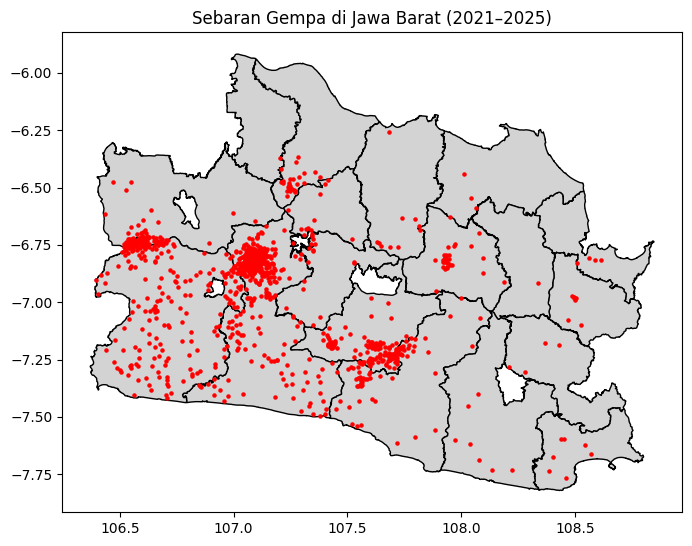

In [ ]:
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df_gempa['longitude'], df_gempa['latitude'])]
gdf_gempa = gpd.GeoDataFrame(df_gempa, geometry=geometry, crs="EPSG:4326")

fig, ax = plt.subplots(figsize=(8, 8))
gdf_jabar.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf_gempa.plot(ax=ax, color='red', markersize=5)
plt.title("Sebaran Gempa di Jawa Barat (2021–2025)")
plt.show()

/tmp/ipython-input-475317679.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gempa_per_kab, x='jumlah_gempa', y='kabupaten', palette='viridis')


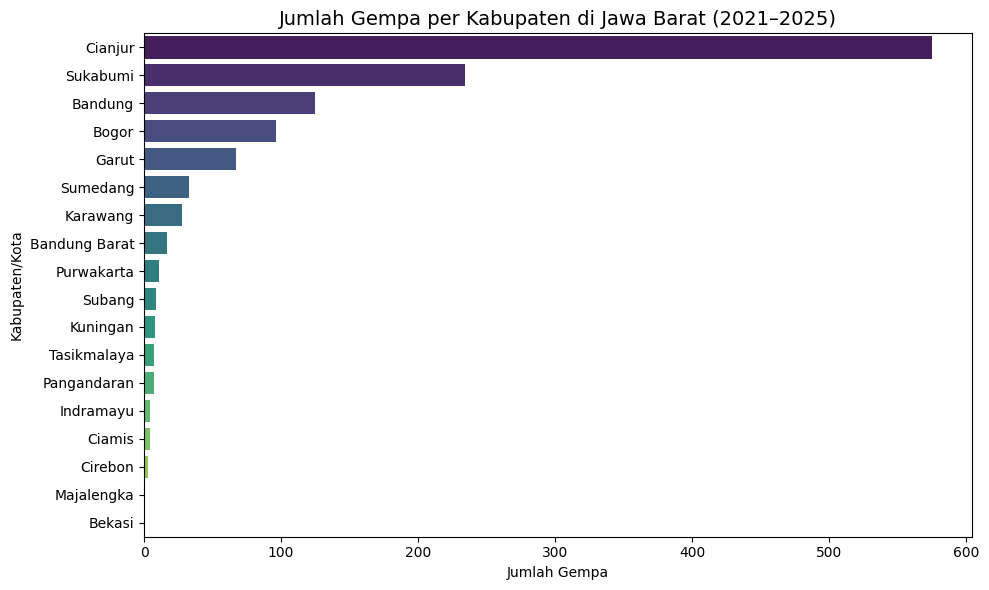

In [ ]:
gempa_per_kab = df_gempa['kabupaten'].value_counts().reset_index()
gempa_per_kab.columns = ['kabupaten', 'jumlah_gempa']

gempa_per_kab = gempa_per_kab.sort_values(by='jumlah_gempa', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=gempa_per_kab, x='jumlah_gempa', y='kabupaten', palette='viridis')

plt.title('Jumlah Gempa per Kabupaten di Jawa Barat (2021–2025)', fontsize=14)
plt.xlabel('Jumlah Gempa')
plt.ylabel('Kabupaten/Kota')
plt.tight_layout()
plt.show()


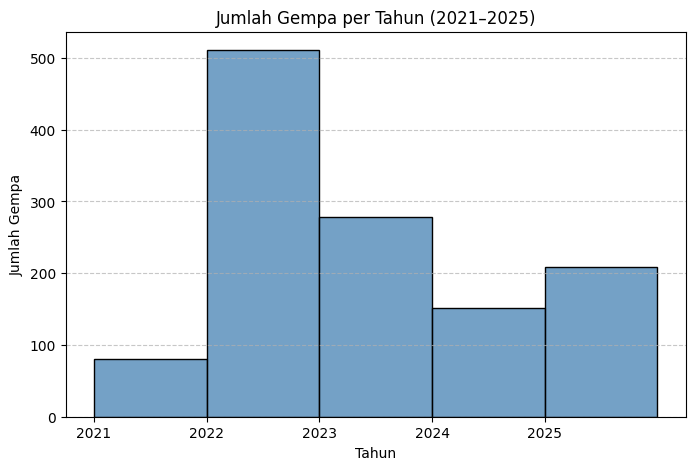

In [ ]:
df_gempa['date'] = pd.to_datetime(df_gempa['date'])
df_gempa['year'] = df_gempa['date'].dt.year

plt.figure(figsize=(8,5))
sns.histplot(df_gempa['year'], bins=range(2021, 2027), kde=False, color='steelblue')
plt.title('Jumlah Gempa per Tahun (2021–2025)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Gempa')
plt.xticks(range(2021, 2026))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-632856815.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keterangan_counts.index, y=keterangan_counts.values, palette="viridis")


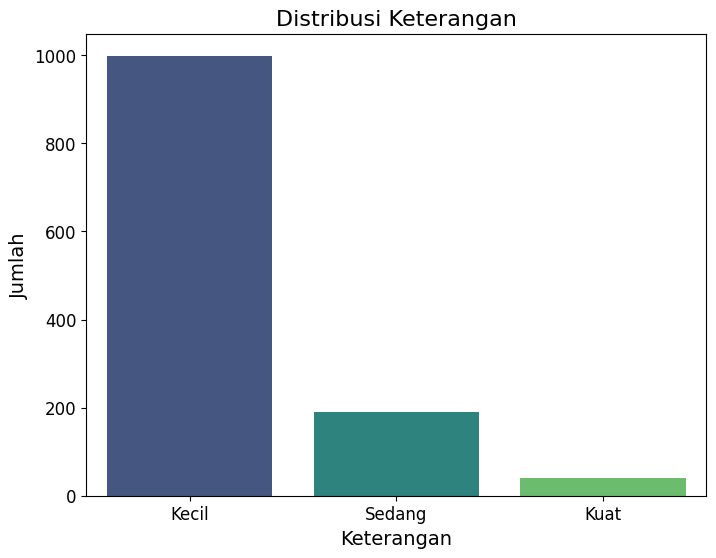

In [ ]:
# Hitung jumlah data di setiap kategori
keterangan_counts = df_gempa['keterangan'].value_counts()

# Buat plot bar menggunakan Matplotlib
plt.figure(figsize=(8, 6))
sns.barplot(x=keterangan_counts.index, y=keterangan_counts.values, palette="viridis")
plt.title('Distribusi Keterangan', fontsize=16)
plt.xlabel('Keterangan', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Text(0.5, 1.0, 'Distribusi Magnitudo Gempa Jawa Barat')

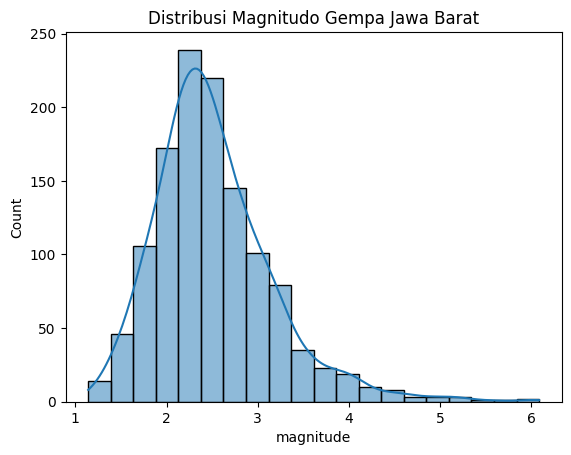

In [ ]:
sns.histplot(df_gempa['magnitude'], bins=20, kde=True)
plt.title('Distribusi Magnitudo Gempa Jawa Barat')
